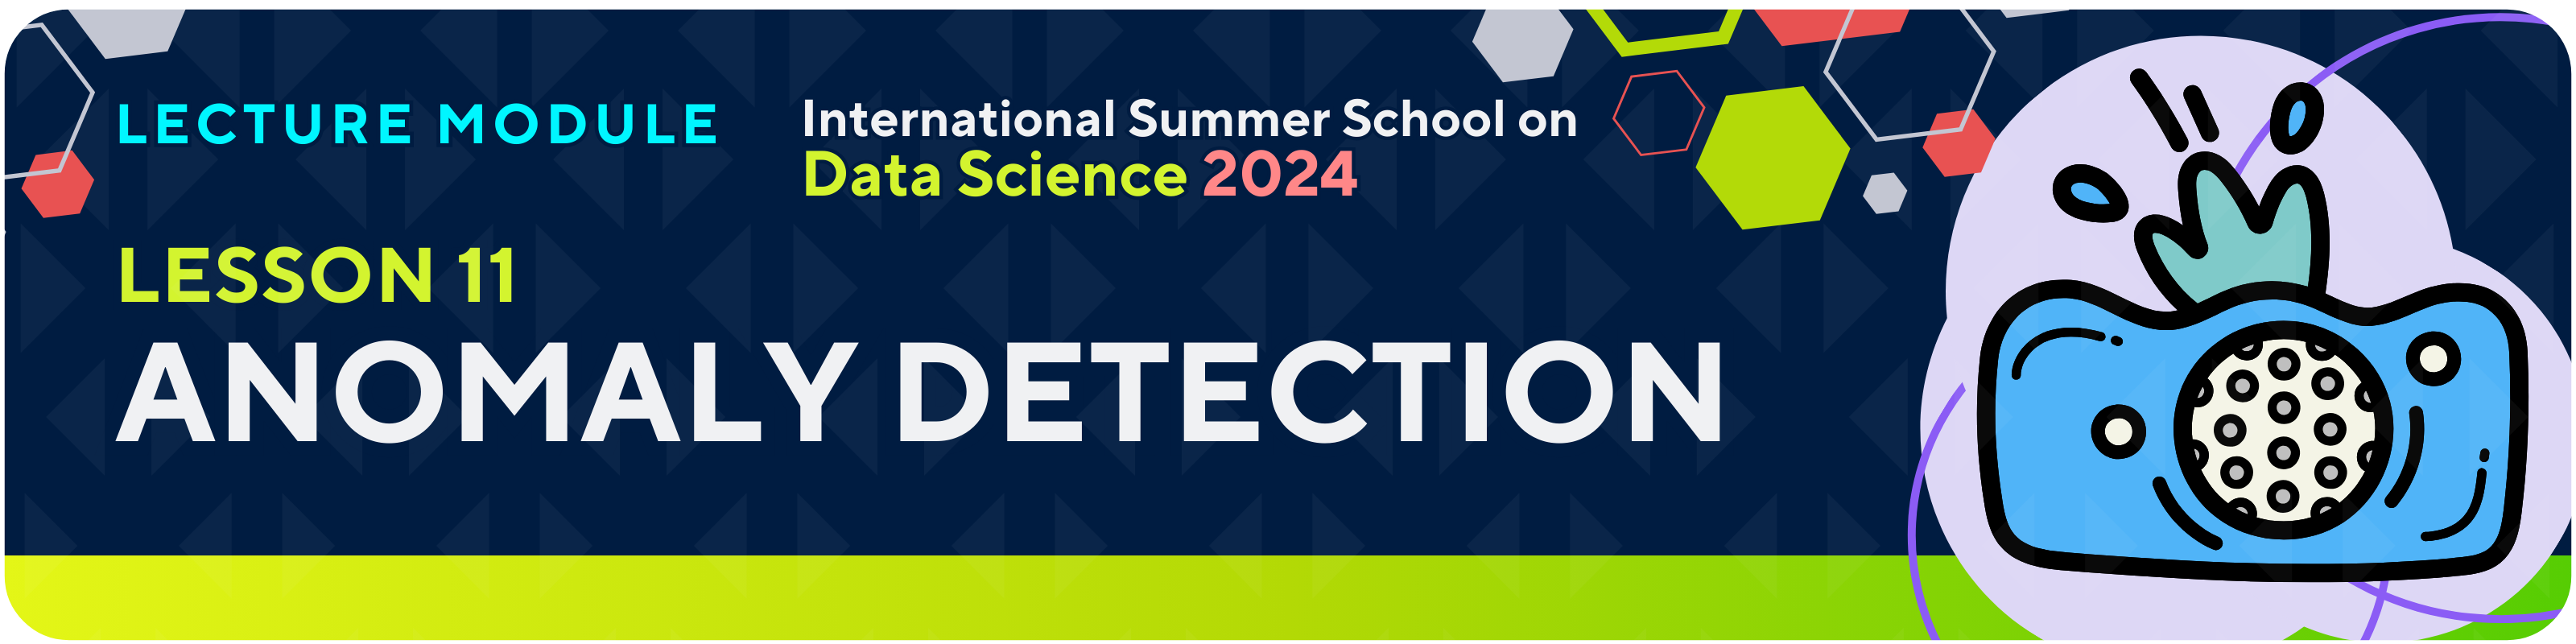

<div class='markdown-google-sans'>

## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Intro To Anomaly Detection**
</div>
<img src="https://i.imgur.com/InlM9qT.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Causes of Outliers**
</div>
<img src="https://i.imgur.com/epf5Sr7.png" width=800 />

<img src="https://i.imgur.com/UWN9pHN.png" width=800 />

<img src="https://i.imgur.com/BiPv84n.png" width=800 />

<img src="https://i.imgur.com/6siwv7I.png" width=800 />

<img src="https://i.imgur.com/PGIPxwy.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Ways to Handle Outliers**
</div>
<img src="https://i.imgur.com/1laiRND.png" width=800 />

<img src="https://i.imgur.com/ZEMbJr6.png" width=800 />

<img src="https://i.imgur.com/bqToh3A.png" width=800 />

<img src="https://i.imgur.com/vXil7Lg.png" width=800 />

<img src="https://i.imgur.com/ZHExBX8.png" width=800 />



<div class='markdown-google-sans'>

### **<font color=#819A00> Approaches for Outlier Detection**
</div>
<img src="https://i.imgur.com/soarOwE.png" width=800 />



<img src="https://i.imgur.com/lyGtWjk.png" width=800 />



<img src="https://i.imgur.com/BcrX5nF.png" width=800 />



<img src="https://i.imgur.com/klSjoXc.png" width=800 />


<img src="https://i.imgur.com/e7COO6b.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Data Cleaning using Anomaly Detection**
</div>

In [ ]:
!pip install pyod -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pyod.models.iforest import IForest

def anomaly_remover(X, contamination=0.1):
    outlier_detector = IForest(contamination=contamination)
    outlier_detector.fit(X)
    outlier_labels = outlier_detector.labels_
    non_outlier_mask = outlier_labels == 0
    return X[non_outlier_mask]

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/l0ty62z9t67qwzjc6i5vb/golf_practice_dataset_mini_outlier.csv?rlkey=d5pydthx4ew0djn1r2if8wkut&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='MembershipID')
X = df.drop(['Outlier'], axis=1)

# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
    ('ohe', OneHotEncoder(), X.select_dtypes(include=['object', 'category']).columns)
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('anomaly_remover', FunctionTransformer(func=anomaly_remover, kw_args={'contamination': 0.1}))
])

# Apply the pipeline to the data
X_processed_clean = pipeline.fit_transform(X)

# Continue with further preprocessing, classification, or regression tasks using the cleaned data

---
---

<div class='markdown-google-sans'>

## **11.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Anomaly Detection: Statistical-based**
</div>
<img src="https://i.imgur.com/XNiZ3BM.png" width=800 />


<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/KiZgXje.png" width=800 />


In [ ]:
!pip install umap-learn -q
!pip install pyod -q
!pip install combo -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Basic Libraries
import pandas as pd
import numpy  as np

# Data Preprocessing
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Data Exploration
import matplotlib.pyplot as plt
import seaborn           as sns

# Pipeline
from imblearn.pipeline  import make_pipeline, Pipeline
from sklearn.compose    import ColumnTransformer

# Dimensionality Reduction
from umap import UMAP
from sklearn.decomposition import PCA

#!pip install pyod -q
#!pip install combo -q

In [ ]:
def draw_data_points(X, X_origin):
    # Plot the data points and labels
    plt.figure(figsize=(4.5, 4), dpi=100)

    if 'AnomalyScore' in X_origin.columns:
        # Plot the data points with color based on anomaly scores
        scatter = plt.scatter(X[:, 0], X[:, 1], c=X_origin['AnomalyScore'], cmap='hot_r', edgecolor='#212121', alpha=0.7, s=350, lw=1.5, zorder=3)

        # Add a colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Anomaly Score', color='#a7afbc')
    else:
        # Plot the data points without color
        plt.scatter(X[:, 0], X[:, 1], color='white', edgecolor='#212121', alpha=0.7, s=500, lw=1.5, zorder=3)

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1]-0.01, str(i), color='black', fontsize=12, fontweight='bold', ha='center', va='center')

    ax = plt.gca()
    text_color = '#a7afbc'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(text_color)
    ax.spines['left'].set_color(text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)

    plt.show()

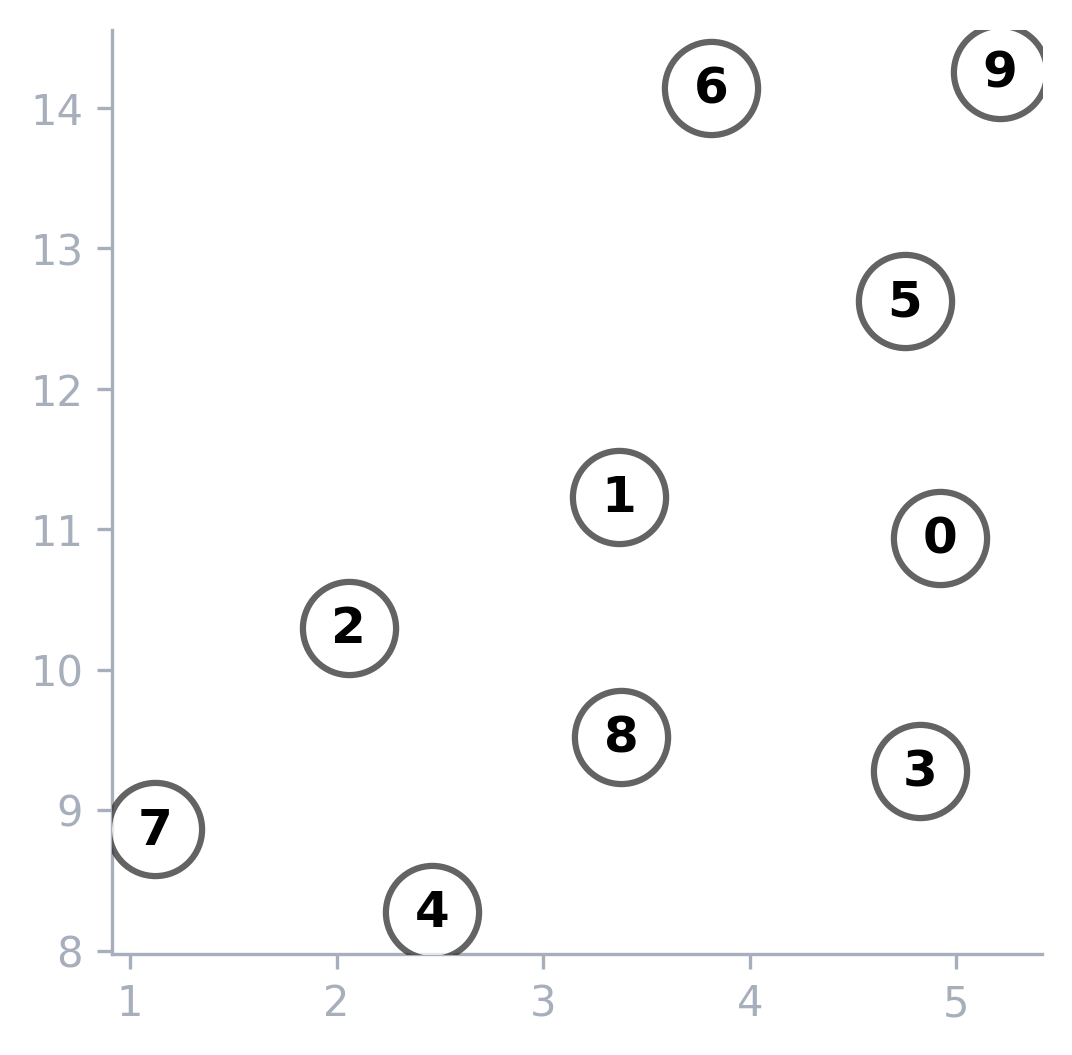

In [ ]:
# Data Preparation
df = pd.DataFrame({
    "Temperature": [73, 75, 70, 68, 60, 77, 85, 50, 72, 95],
    "Humidity": [58, 60, 65, 50, 90, 55, 40, 95, 60, 30],
    "WindSpeed": [2.5, 2.0, 3.0, 2.0, 1.5, 2.5, 4.5, 0.0, 2.0, 6.5],
    "Crowdedness": [20, 20, 15, 18, 22, 20, 25, 5, 18, 30]
})

X = df.copy()

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Preprocess Training Set
X_processed = preprocessor.fit_transform(X)

# Visualize
method = UMAP(n_neighbors=3, min_dist=1, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

draw_data_points(X_transformed, X)
#plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=10, alpha=0.7)
#plt.show()

<div class='markdown-google-sans'>

### **Z-score**
</div>
<img src="https://i.imgur.com/5bXS99O.png" width=800 />


<img src="https://i.imgur.com/VAPXPiz.png" width=800 />

<img src="https://i.imgur.com/mdzp9mT.png" width=800 />

<img src="https://i.imgur.com/5CuQRIL.png" width=800 />


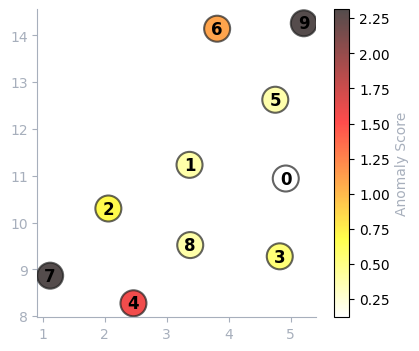

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# Z-score test
z_scores = zscore(X_processed)
outliers_zscore = np.abs(z_scores) > 2.8
X['Outlier'] = outliers_zscore.any(axis=1).astype(int)
X['AnomalyScore'] = np.max(np.abs(z_scores), axis=1)

draw_data_points(X_transformed, X)

<div class='markdown-google-sans'>

### **Interquartile Range**
</div>
<img src="https://i.imgur.com/ST5P66B.png" width=800 />


<img src="https://i.imgur.com/pZynn9N.png" width=800 />

<img src="https://i.imgur.com/tAq7zdp.png" width=800 />

<img src="https://i.imgur.com/rpJUh5P.png" width=800 />



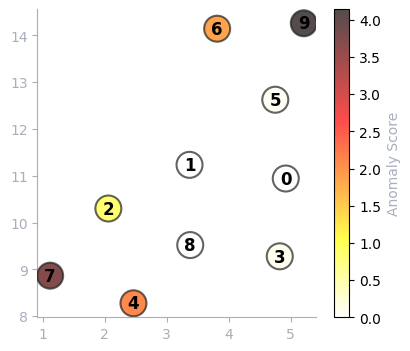

In [ ]:
import numpy as np

# Interquartile range (IQR)
Q1, Q3 = np.percentile(X_processed, [25, 75], axis=0)
IQR = Q3 - Q1
bounds = np.array([Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
X['Outlier'] = ((X_processed < bounds[0]) | (X_processed > bounds[1])).any(axis=1).astype(int)

scores = np.maximum(0, np.abs(X_processed - np.mean(bounds, axis=0)) - 0.5 * IQR) / IQR
X['AnomalyScore'] = scores.max(axis=1)

draw_data_points(X_transformed, X)

<img src="https://i.imgur.com/AxKOQJJ.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Anomaly Detection: Statistical-based** Summarized
</div>

In [ ]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from umap import UMAP

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import outlier_test

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/l0ty62z9t67qwzjc6i5vb/golf_practice_dataset_mini_outlier.csv?rlkey=d5pydthx4ew0djn1r2if8wkut&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='MembershipID')
X = df.drop(['Outlier'], axis=1)

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Preprocess Training Set
X_processed = preprocessor.fit_transform(X)

# Z-score test
z_scores = zscore(X_processed)
outliers_zscore = np.abs(z_scores) > 3
X['Outlier'] = outliers_zscore.any(axis=1).astype(int)
X['AnomalyScore'] = np.max(np.abs(z_scores), axis=1)

# Grubbs test
# outliers_grubbs = outlier_test(X_processed, method='grubbs')
# X['Outlier'] = outliers_grubbs['bonf(p)'] < 0.05
# X['AnomalyScore'] = -np.log10(outliers_grubbs['bonf(p)'])

# Interquartile range (IQR)
# Q1, Q3 = np.percentile(X_processed, [25, 75], axis=0)
# IQR = Q3 - Q1
# bounds = np.array([Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
# X['Outlier'] = ((X_processed < bounds[0]) | (X_processed > bounds[1])).any(axis=1).astype(int)
# scores = np.maximum(0, np.abs(X_processed - np.mean(bounds, axis=0)) - 0.5 * IQR) / IQR
# X['AnomalyScore'] = scores.max(axis=1)

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
anomaly_df = X[X['Outlier'] == 1]
print(anomaly_df)

              YearsOfExperience  HandicapIndex  AvgDrivingDistance  \
MembershipID                                                         
OF06477                    20.5            2.9               286.3   
ZO79706                     1.1            2.8               404.2   
HP56962                    24.0            0.4               315.3   
RK29330                    23.7            0.4               325.5   
WQ50488                     6.2           21.1               224.0   
IQ40272                    10.3           23.1               191.4   
YJ44626                     3.5           28.9               181.0   
UK96883                     5.3           42.8               285.3   
YN01534                     5.2           16.0               256.8   
DI08591                     1.2            0.2               389.6   
IC95180                     6.0           23.1               251.3   
GP50398                     6.2           10.2               271.1   
MR82767             

<a href="https://claude.ai/chats"><img src="https://i.imgur.com/qnJP04g.png" width=60/></a> <font size=5>**Explain why these data flagged as the outliers?**

Potential reasons for being flagged as outliers:

**a) Extreme values:**
Some entries have very high or low values in certain columns. For example:

* ZO79706 has an extremely high AvgDrivingDistance (404.2) and PreferredTemperature (95.0)
* IQ40272 has a very low DrivingAccuracy (13.9)
* UK96883 has an unusually high DrivingAccuracy (112.6)

**b) Unusual combinations:**
Some entries show unexpected combinations of skills or preferences:

* DI08591 has very low YearsOfExperience (1.2) but an excellent HandicapIndex (0.2)
* FK81131 has high YearsOfExperience (30.0) but a poor HandicapIndex (25.6)

**c) Inconsistent performance metrics:**
Some entries show contradictions in their golf performance:

* GP50398 has a decent HandicapIndex (10.2) but very low GreensInRegulation (15.4)
* ZX04239 has good AvgDrivingDistance (318.6) but low GreensInRegulation (35.8)

**d) Extreme weather preferences:**
Some golfers have unusual climate preferences:

* LQ07533 prefers very high temperatures (107.2) and humidity (110)
* FR99874 prefers very low temperatures (50.0)

**e) Unusual skill development:**
Some entries show unexpected skill levels for their experience:

* ZO79706 has only 1.1 YearsOfExperience but excellent stats across the board

**f) Highest AnomalyScores:**
DO52346 and FK81131 have the highest AnomalyScores (7.565972), which could be due to their combination of high YearsOfExperience (28.8 and 30.0) and very good HandicapIndex (0.3 and 25.6 respectively), along with other factors.

In conclusion, these data points are likely flagged as outliers due to a combination of extreme values, unusual combinations of attributes, inconsistencies in performance metrics, and unexpected patterns given their experience levels. The AnomalyScore seems to quantify how much each entry deviates from the expected patterns in the dataset.

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 11-2**
</div>
Using interquartile range, get the outliers of the following dataset. Save it in a column called 'Outlier' then check the visualization using TSNE.

In [ ]:
# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Data Preparation
X_train = df.drop(['Play'], axis=1)

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('std_scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Transform Training Set
X_processed = preprocessor.fit_transform(X_train)

In [ ]:
# Answer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from umap import UMAP

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import outlier_test


# # Z-score test
# z_scores = zscore(X_processed)
# outliers_zscore = np.abs(z_scores) > 3
# X['Outlier'] = outliers_zscore.any(axis=1).astype(int)
# X['AnomalyScore'] = np.max(np.abs(z_scores), axis=1)

# Grubbs test
# outliers_grubbs = outlier_test(X_processed, method='grubbs')
# X['Outlier'] = outliers_grubbs['bonf(p)'] < 0.05
# X['AnomalyScore'] = -np.log10(outliers_grubbs['bonf(p)'])

#Interquartile range (IQR)
Q1, Q3 = np.percentile(X_processed, [25, 75], axis=0)
IQR = Q3 - Q1
bounds = np.array([Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
X['Outlier'] = ((X_processed < bounds[0]) | (X_processed > bounds[1])).any(axis=1).astype(int)
scores = np.maximum(0, np.abs(X_processed - np.mean(bounds, axis=0)) - 0.5 * IQR) / IQR
X['AnomalyScore'] = scores.max(axis=1)

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

ValueError: Length of values (200) does not match length of index (746)

---
---

<div class='markdown-google-sans'>

## **11.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Anomaly Detection: Distance-based**
</div>
<img src="https://i.imgur.com/dPlr1si.png" width=800 />



<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/KiZgXje.png" width=800 />


In [ ]:
!pip install umap-learn -q
# Installs the UMAP (Uniform Manifold Approximation and Projection) library
# Used for dimensionality reduction and visualization

!pip install pyod -q
# Installs PyOD (Python Outlier Detection) library
# This is the main library for various anomaly detection algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Basic Libraries
import pandas as pd
import numpy  as np

# Data Preprocessing
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Data Exploration
import matplotlib.pyplot as plt
import seaborn           as sns

# Pipeline
from imblearn.pipeline  import make_pipeline, Pipeline
from sklearn.compose    import ColumnTransformer

# Dimensionality Reduction
from umap import UMAP
from sklearn.decomposition import PCA

#!pip install pyod -q
#!pip install combo -q

In [ ]:
def draw_data_points(X, X_origin):
    # Plot the data points and labels
    plt.figure(figsize=(4.5, 4), dpi=100)

    if 'AnomalyScore' in X_origin.columns:
        # Plot the data points with color based on anomaly scores
        scatter = plt.scatter(X[:, 0], X[:, 1], c=X_origin['AnomalyScore'], cmap='hot_r', edgecolor='#212121', alpha=0.7, s=350, lw=1.5, zorder=3)

        # Add a colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Anomaly Score', color='#a7afbc')
    else:
        # Plot the data points without color
        plt.scatter(X[:, 0], X[:, 1], color='white', edgecolor='#212121', alpha=0.7, s=500, lw=1.5, zorder=3)

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1]-0.01, str(i), color='black', fontsize=12, fontweight='bold', ha='center', va='center')

    ax = plt.gca()
    text_color = '#a7afbc'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(text_color)
    ax.spines['left'].set_color(text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)

    plt.show()

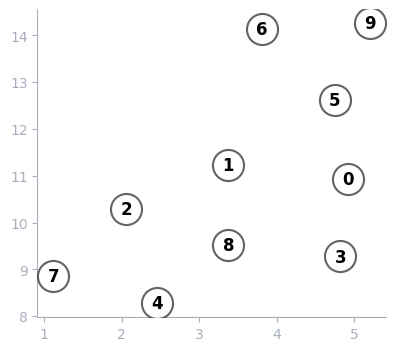

In [ ]:
# Data Preparation
df = pd.DataFrame({
    "Temperature": [73, 75, 70, 68, 60, 77, 85, 50, 72, 95],
    "Humidity": [58, 60, 65, 50, 90, 55, 40, 95, 60, 30],
    "WindSpeed": [2.5, 2.0, 3.0, 2.0, 1.5, 2.5, 4.5, 0.0, 2.0, 6.5],
    "Crowdedness": [20, 20, 15, 18, 22, 20, 25, 5, 18, 30]
})

X = df.copy()

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Preprocess Training Set
X_processed = preprocessor.fit_transform(X)

# Visualize
method = UMAP(n_neighbors=3, min_dist=1, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

draw_data_points(X_transformed, X)
#plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=10, alpha=0.7)
#plt.show()

<div class='markdown-google-sans'>

### **KNN**
</div>
<img src="https://i.imgur.com/RpkglyY.png" width=800 />


<img src="https://i.imgur.com/IrrtmB3.png" width=800 />

<img src="https://i.imgur.com/N9odKF9.png" width=800 />

<img src="https://i.imgur.com/kE77HGp.png" width=800 />


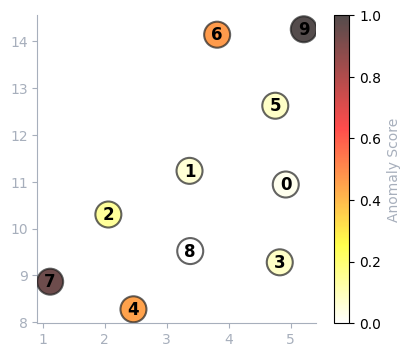

In [ ]:
from pyod.models.knn import KNN

model = KNN(n_neighbors=4, method='largest')
model.fit(X_processed)

# Get outlier labels and anomaly scores
X['Outlier'] = model.labels_
scaler = MinMaxScaler()
X['AnomalyScore'] = scaler.fit_transform(model.decision_scores_.reshape(-1,1))

draw_data_points(X_transformed, X)

<div class='markdown-google-sans'>

### **LOF**
</div>
<img src="https://i.imgur.com/Yb5uhj2.png" width=800 />


<img src="https://i.imgur.com/dIt2B0O.png" width=800 />

<img src="https://i.imgur.com/0iMiK3h.png" width=800 />

<img src="https://i.imgur.com/1w3ij9X.png" width=800 />

<img src="https://i.imgur.com/28Cvd15.png" width=800 />


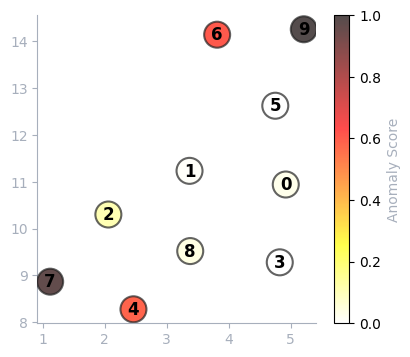

In [ ]:
from pyod.models.lof import LOF

model = LOF(n_neighbors=4)
model.fit(X_processed)

# Get outlier labels and anomaly scores
X['Outlier'] = model.labels_
scaler = MinMaxScaler()
X['AnomalyScore'] = scaler.fit_transform(model.decision_scores_.reshape(-1,1))

draw_data_points(X_transformed, X)

<div class='markdown-google-sans'>

### **DBSCAN**
</div>
<img src="https://i.imgur.com/yi1lzAq.png" width=800 />


<img src="https://i.imgur.com/OfKT6uV.png" width=800 />

<img src="https://i.imgur.com/Kwcnpot.png" width=800 />

<img src="https://i.imgur.com/sBb8fWU.png" width=800 />

<img src="https://i.imgur.com/677apU7.png" width=800 />




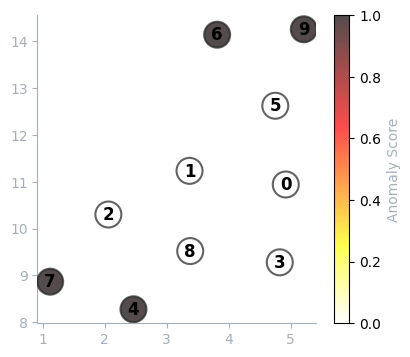

In [ ]:
from sklearn.cluster import DBSCAN

# Fit the DBSCAN model
dbscan = DBSCAN(eps=1, min_samples=2)
labels = dbscan.fit_predict(X_processed)

# Identify outliers
X['Outlier'] = (labels == -1).astype(int)

# Calculate anomaly scores
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
anomaly_scores = 1 - core_samples_mask.astype(float)

# Normalize the anomaly scores to the 0-1 range
X['AnomalyScore'] = anomaly_scores.reshape(-1, 1)

draw_data_points(X_transformed, X)

In [ ]:
<img src="https://i.imgur.com/jjWaXMA.png" width=800 />

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Anomaly Detection: Distance-based** Summarized
</div>

In [ ]:
!pip install umap-learn -q
!pip install pyod -q

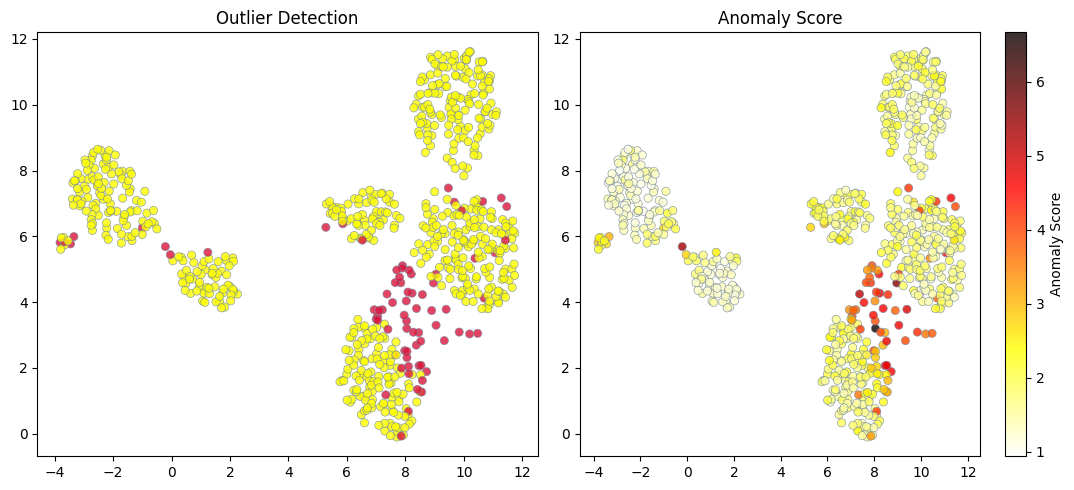

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from umap import UMAP

from sklearn.cluster import DBSCAN
from pyod.models.knn import KNN
from pyod.models.lof import LOF

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/l0ty62z9t67qwzjc6i5vb/golf_practice_dataset_mini_outlier.csv?rlkey=d5pydthx4ew0djn1r2if8wkut&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='MembershipID')
X = df.drop(['Outlier'], axis=1)

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Preprocess Training Set
X_processed = preprocessor.fit_transform(X)

# KNN
model = KNN(n_neighbors=5, method='largest')
# model = LOF(n_neighbors=20, contamination=0.1)
model.fit(X_processed)
X['Outlier'] = model.labels_
X['AnomalyScore'] = model.decision_scores_

# LOF
# model = LOF(n_neighbors=20, contamination=0.1)
# model.fit(X_processed)
# X['Outlier'] = model.labels_
# X['AnomalyScore'] = model.decision_scores_

# DBSCAN
# Fit the DBSCAN model
# dbscan = DBSCAN(eps=1, min_samples=2)
# labels = dbscan.fit_predict(X_processed)
# X['Outlier'] = (labels == -1).astype(int)
# core_samples_mask = np.zeros_like(labels, dtype=bool)
# core_samples_mask[dbscan.core_sample_indices_] = True
# X['AnomalyScore'] = 1 - core_samples_mask.astype(float)

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 11-3**
</div>

Using Local Outlier Factor, get the outliers of the following dataset. Save it in a column called 'Outlier' then check the visualization using UMAP.

In [ ]:
# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Data Preparation
X = df.drop(['Play'], axis=1)

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('std_scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Preprocess Training Set
X_processed = preprocessor.fit_transform(X)

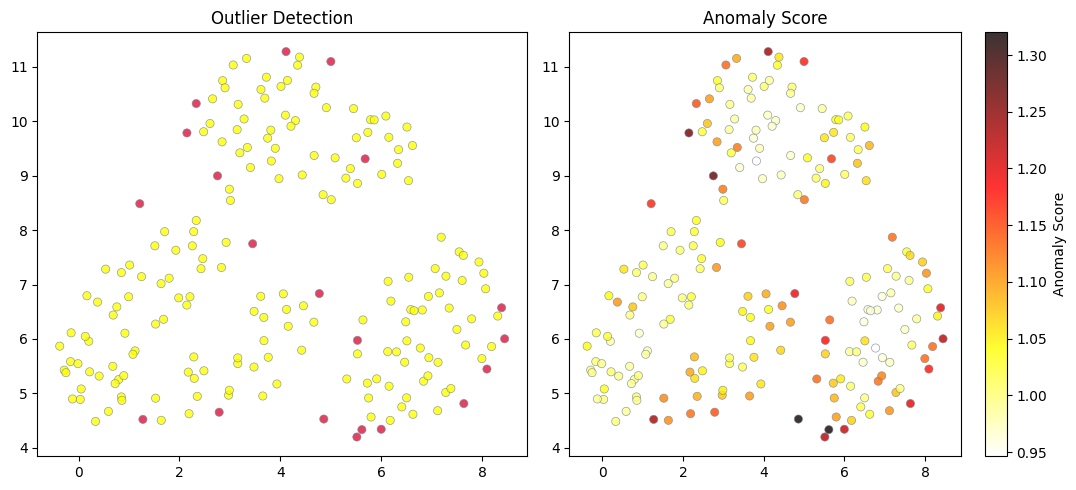

In [ ]:
from pyod.models.lof import LOF
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from umap import UMAP

from sklearn.cluster import DBSCAN
from pyod.models.knn import KNN
from pyod.models.lof import LOF
# Answer
# KNN

# model = KNN(n_neighbors=5, method='largest')
# # model = LOF(n_neighbors=20, contamination=0.1)
# model.fit(X_processed)
# X['Outlier'] = model.labels_
# X['AnomalyScore'] = model.decision_scores_

LOF
model = LOF(n_neighbors=20, contamination=0.1)
model.fit(X_processed)
X['Outlier'] = model.labels_
X['AnomalyScore'] = model.decision_scores_

# DBSCAN
# Fit the DBSCAN model
# dbscan = DBSCAN(eps=1, min_samples=2)
# labels = dbscan.fit_predict(X_processed)
# X['Outlier'] = (labels == -1).astype(int)
# core_samples_mask = np.zeros_like(labels, dtype=bool)
# core_samples_mask[dbscan.core_sample_indices_] = True
# X['AnomalyScore'] = 1 - core_samples_mask.astype(float)

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

---
---

<div class='markdown-google-sans'>

## **11.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Anomaly Detection: Machine Learning**
</div>
<img src="https://i.imgur.com/VEN8fw8.png" width=800 />


<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/KiZgXje.png" width=800 />


In [ ]:
!pip install umap-learn -q
# Installs the UMAP (Uniform Manifold Approximation and Projection) library
# Used for dimensionality reduction and visualization

!pip install pyod -q
# Installs PyOD (Python Outlier Detection) library
# This is the main library for various anomaly detection algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 673.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Basic Libraries
import pandas as pd
import numpy  as np

# Data Preprocessing
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Data Exploration
import matplotlib.pyplot as plt
import seaborn           as sns

# Pipeline
from imblearn.pipeline  import make_pipeline, Pipeline
from sklearn.compose    import ColumnTransformer

# Dimensionality Reduction
from umap import UMAP
from sklearn.decomposition import PCA

In [ ]:
def draw_data_points(X, X_origin):
    # Plot the data points and labels
    plt.figure(figsize=(4.5, 4), dpi=100)

    if 'AnomalyScore' in X_origin.columns:
        # Plot the data points with color based on anomaly scores
        scatter = plt.scatter(X[:, 0], X[:, 1], c=X_origin['AnomalyScore'], cmap='hot_r', edgecolor='#212121', alpha=0.7, s=350, lw=1.5, zorder=3)

        # Add a colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Anomaly Score', color='#a7afbc')
    else:
        # Plot the data points without color
        plt.scatter(X[:, 0], X[:, 1], color='white', edgecolor='#212121', alpha=0.7, s=500, lw=1.5, zorder=3)

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1]-0.01, str(i), color='black', fontsize=12, fontweight='bold', ha='center', va='center')

    ax = plt.gca()
    text_color = '#a7afbc'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(text_color)
    ax.spines['left'].set_color(text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)

    plt.show()

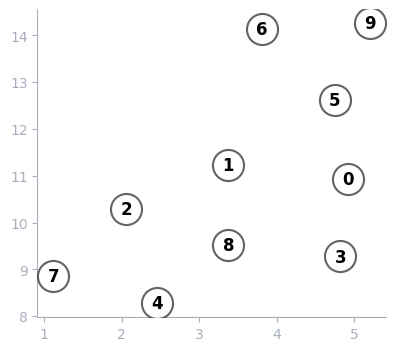

In [ ]:
# Data Preparation
df = pd.DataFrame({
    "Temperature": [73, 75, 70, 68, 60, 77, 85, 50, 72, 95],
    "Humidity": [58, 60, 65, 50, 90, 55, 40, 95, 60, 30],
    "WindSpeed": [2.5, 2.0, 3.0, 2.0, 1.5, 2.5, 4.5, 0.0, 2.0, 6.5],
    "Crowdedness": [20, 20, 15, 18, 22, 20, 25, 5, 18, 30]
})

X = df.copy()

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Preprocess Training Set
X_processed = preprocessor.fit_transform(X)

# Visualize
method = UMAP(n_neighbors=3, min_dist=1, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

draw_data_points(X_transformed, X)
#plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=10, alpha=0.7)
#plt.show()

<div class='markdown-google-sans'>

### **Isolation Forest**
</div>
<img src="https://i.imgur.com/r2ACFZ9.png" width=800 />


<img src="https://i.imgur.com/aG3kJrK.png" width=800 />

<img src="https://i.imgur.com/oav0nHd.png" width=800 />

<img src="https://i.imgur.com/f0bkbeB.png" width=800 />

<img src="https://i.imgur.com/7H5FrTA.png" width=800 />

<img src="https://i.imgur.com/D93VUcq.png" width=800 />

<img src="https://i.imgur.com/vW17Pvf.png" width=800 />

<img src="https://i.imgur.com/mR1kQ7Q.png" width=800 />

<img src="https://i.imgur.com/5p3BCw9.png" width=800 />


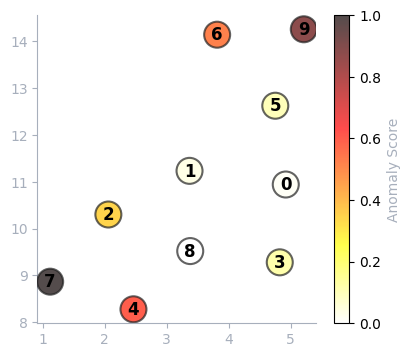

In [ ]:
from pyod.models.iforest import IForest

model = IForest(n_estimators=100, contamination=0.1)
model.fit(X_processed)

# Get outlier labels and anomaly scores
X['Outlier'] = model.labels_
scaler = MinMaxScaler()
X['AnomalyScore'] = scaler.fit_transform(model.decision_scores_.reshape(-1,1))

draw_data_points(X_transformed, X)

<div class='markdown-google-sans'>

### **One-Class SVM**
</div>
<img src="https://i.imgur.com/hRoELGi.png" width=800 />

<img src="https://i.imgur.com/iPsyewq.png" width=800 />

<img src="https://i.imgur.com/obrNNQO.png" width=800 />

<img src="https://i.imgur.com/SEaiVcx.png" width=800 />

<img src="https://i.imgur.com/VYv2frY.png" width=800 />

<img src="https://i.imgur.com/EWoj0kt.png" width=800 />



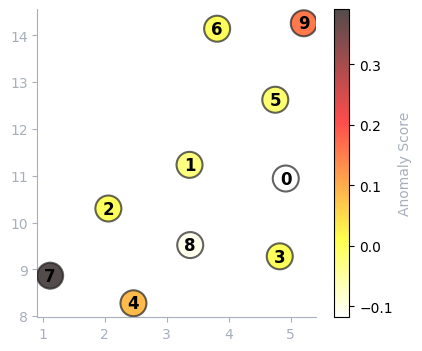

In [ ]:
# Unsupervised OCSVM
from pyod.models.ocsvm import OCSVM

model = OCSVM()
model.fit(X_processed)
X['Outlier'] = model.labels_
X['AnomalyScore'] = model.decision_scores_

draw_data_points(X_transformed, X)

<div class='markdown-google-sans'>

### **Autoencoder**
</div>
<img src="https://i.imgur.com/bPw9ZIy.png" width=800 />


<img src="https://i.imgur.com/ZPxNByU.png" width=800 />


Training: 100%|██████████| 10/10 [00:00<00:00, 18.71it/s]


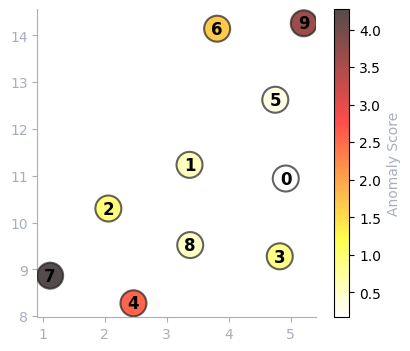

In [ ]:
from pyod.models.auto_encoder import AutoEncoder

model = AutoEncoder(batch_size=2)
model.fit(X_processed)
X['Outlier'] = model.labels_
X['AnomalyScore'] = model.decision_scores_

draw_data_points(X_transformed, X)

<img src="https://i.imgur.com/3xksLC6.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Anomaly Detection: Machine Learning-based** Summarized
</div>

In [ ]:
!pip install umap-learn -q
!pip install pyod -q

Training: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]


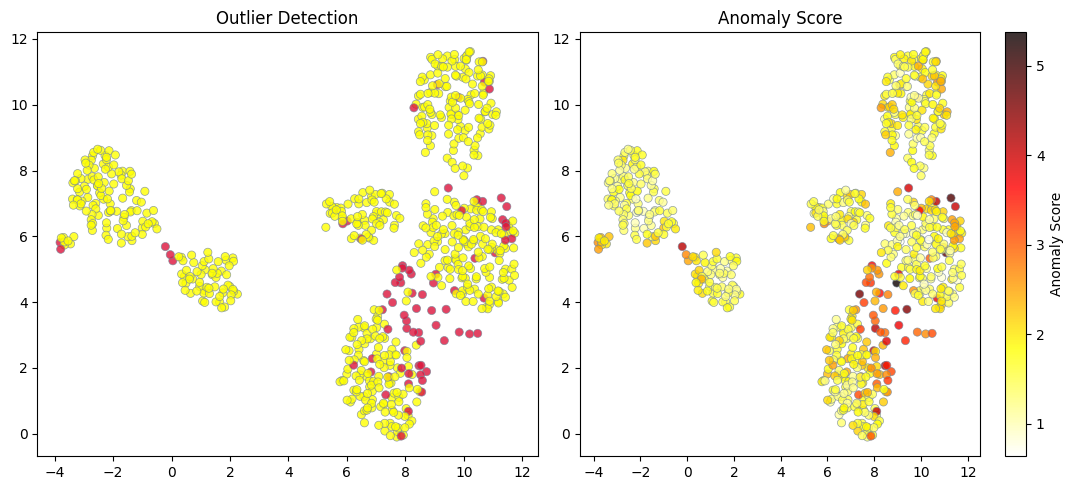

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from umap import UMAP

from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.auto_encoder import AutoEncoder

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/l0ty62z9t67qwzjc6i5vb/golf_practice_dataset_mini_outlier.csv?rlkey=d5pydthx4ew0djn1r2if8wkut&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='MembershipID')
X = df.drop(['Outlier'], axis=1)

# Preprocessing
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
    ('ohe', OneHotEncoder(), X.select_dtypes(include=['object', 'category']).columns)
], remainder='passthrough')
X_processed = preprocessor.fit_transform(X)

# Perform Outlier Detection
# model = IForest(n_estimators=100, contamination=0.1)
# model = OCSVM(nu=0.1)
model = AutoEncoder()
model.fit(X_processed)

# Get outlier labels and anomaly scores
X['Outlier'] = model.labels_
X['AnomalyScore'] = model.decision_scores_

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 11-4**
</div>
Using Isolation Forest, get the outliers of the following dataset. Save it in a column called 'Outlier' then check the visualization using TSNE.

In [ ]:
# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Data Preparation
X_train = df.drop(['Play'], axis=1)

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('std_scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Transform Training Set
X_processed = preprocessor.fit_transform(X_train)

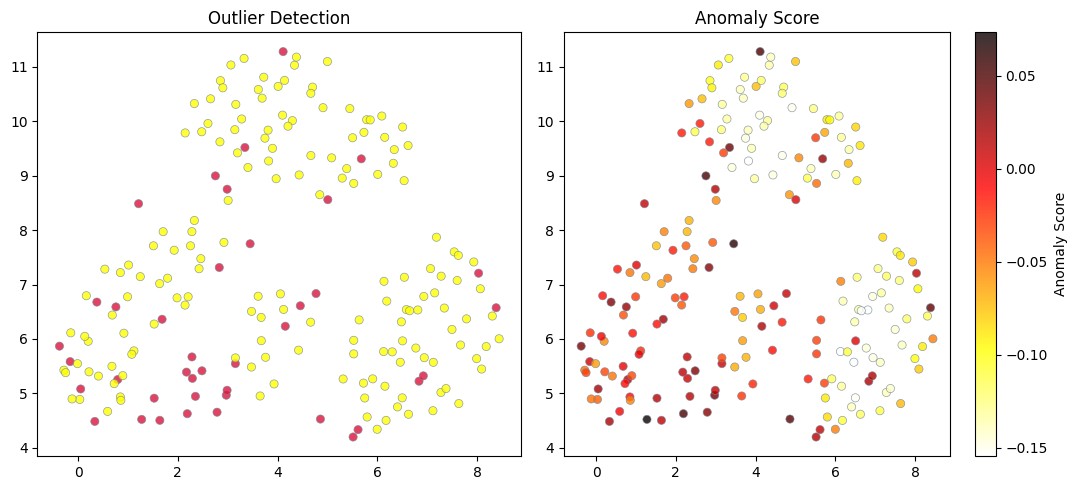

In [ ]:
from pyod.models.iforest import IForest
# Answer
# Perform Outlier Detection
model = IForest(n_estimators=100, contamination=0.2)
# model = OCSVM(nu=0.1)
# model = AutoEncoder()
model.fit(X_processed)

# Get outlier labels and anomaly scores
X['Outlier'] = model.labels_
X['AnomalyScore'] = model.decision_scores_

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

---
---

<div class='markdown-google-sans'>

## **11.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Anomaly Detection: Ensemble-based**
</div>
<img src="https://i.imgur.com/scRHz3K.png" width=700 />

<img src="https://i.imgur.com/Xk8XbyF.png" width=700 />


<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/KiZgXje.png" width=800 />


In [ ]:
!pip install umap-learn -q
# Installs the UMAP (Uniform Manifold Approximation and Projection) library
# Used for dimensionality reduction and visualization

!pip install pyod -q
# Installs PyOD (Python Outlier Detection) library
# This is the main library for various anomaly detection algorithms

!pip install combo -q
# Installs the Combo library
# This library provides combination methods for outlier detection ensembles

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Basic Libraries
import pandas as pd
import numpy  as np

# Data Preprocessing
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Data Exploration
import matplotlib.pyplot as plt
import seaborn           as sns

# Pipeline
from imblearn.pipeline  import make_pipeline, Pipeline
from sklearn.compose    import ColumnTransformer

# Dimensionality Reduction
from umap import UMAP
from sklearn.decomposition import PCA

#!pip install pyod -q
#!pip install combo -q

In [ ]:
def draw_data_points(X, X_origin):
    # Plot the data points and labels
    plt.figure(figsize=(4.5, 4), dpi=100)

    if 'AnomalyScore' in X_origin.columns:
        # Plot the data points with color based on anomaly scores
        scatter = plt.scatter(X[:, 0], X[:, 1], c=X_origin['AnomalyScore'], cmap='hot_r', edgecolor='#212121', alpha=0.7, s=350, lw=1.5, zorder=3)

        # Add a colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Anomaly Score', color='#a7afbc')
    else:
        # Plot the data points without color
        plt.scatter(X[:, 0], X[:, 1], color='white', edgecolor='#212121', alpha=0.7, s=500, lw=1.5, zorder=3)

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1]-0.01, str(i), color='black', fontsize=12, fontweight='bold', ha='center', va='center')

    ax = plt.gca()
    text_color = '#a7afbc'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(text_color)
    ax.spines['left'].set_color(text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)

    plt.show()

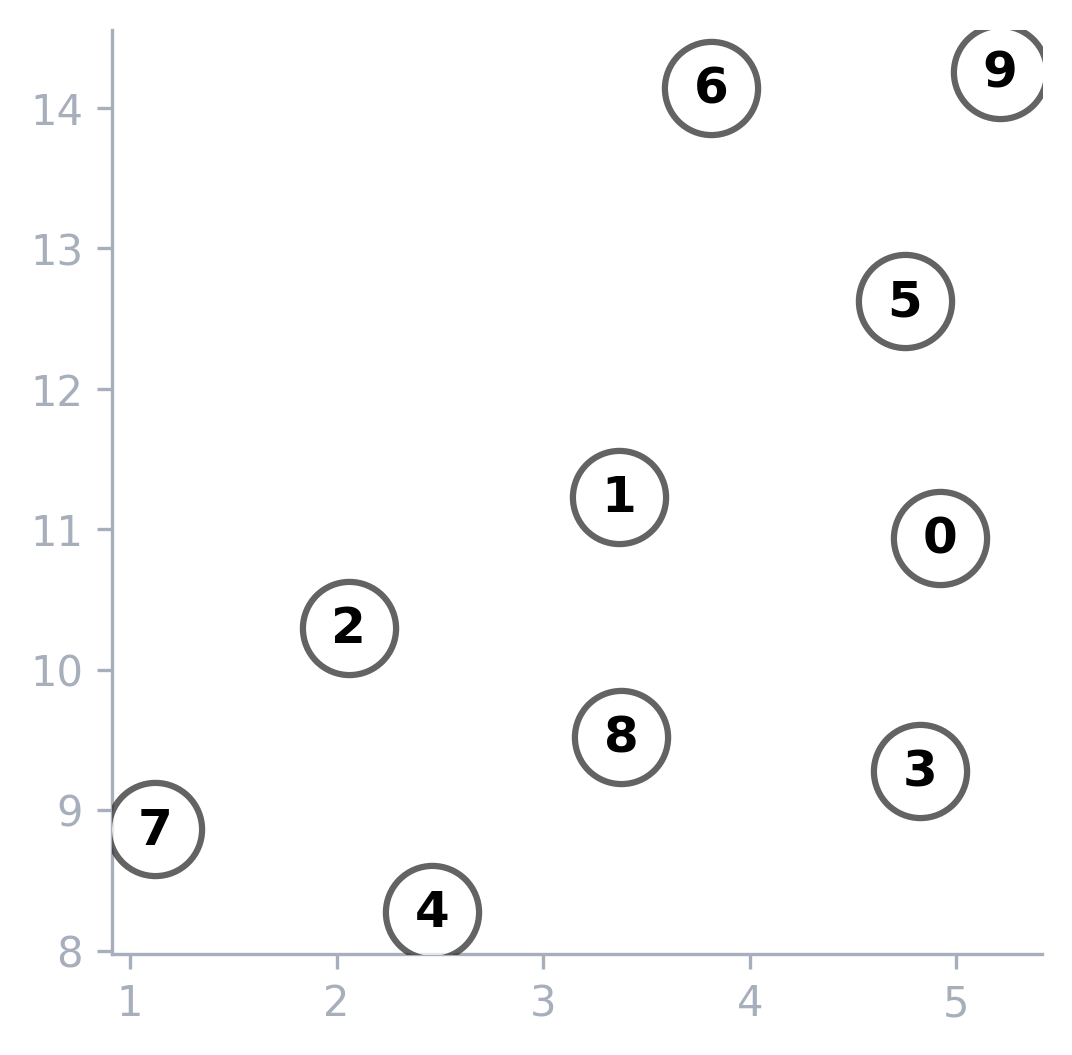

In [ ]:
# Data Preparation
df = pd.DataFrame({
    "Temperature": [73, 75, 70, 68, 60, 77, 85, 50, 72, 95],
    "Humidity": [58, 60, 65, 50, 90, 55, 40, 95, 60, 30],
    "WindSpeed": [2.5, 2.0, 3.0, 2.0, 1.5, 2.5, 4.5, 0.0, 2.0, 6.5],
    "Crowdedness": [20, 20, 15, 18, 22, 20, 25, 5, 18, 30]
})

X = df.copy()

# Preprocessing
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Preprocess Training Set
X_processed = preprocessor.fit_transform(X)

# Visualize
method = UMAP(n_neighbors=3, min_dist=1, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

draw_data_points(X_transformed, X)
#plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=10, alpha=0.7)
#plt.show()

<div class='markdown-google-sans'>

### **Combination**
</div>
<img src="https://i.imgur.com/2QCsfD7.png" width=800 />



<div class='markdown-google-sans'>

#### **Averaging**
</div>
<img src="https://i.imgur.com/dtjXGwd.png" width=800 />


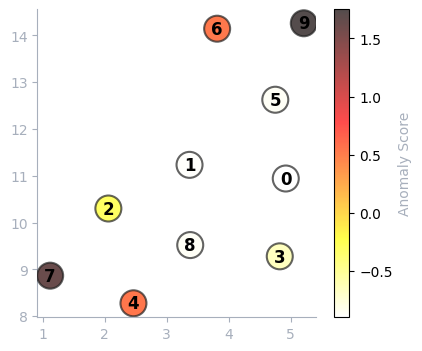

In [ ]:
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.combination import average, maximization
from pyod.utils.utility import standardizer

base_models = [KNN(n_neighbors=2), LOF(n_neighbors=4), IForest(n_estimators=100)]
outlier_scores = [model.fit(X_processed).decision_scores_ for model in base_models]
outlier_scores_norm = standardizer(np.column_stack(outlier_scores))
combined_score = average(outlier_scores_norm)

X['AnomalyScore'] = combined_score
X['Outlier'] = np.where(X['AnomalyScore'] > np.percentile(X['AnomalyScore'], 90), 1, 0)

draw_data_points(X_transformed, X)

<div class='markdown-google-sans'>

#### **Maximization**
</div>
<img src="https://i.imgur.com/SHmy4AS.png" width=800 />


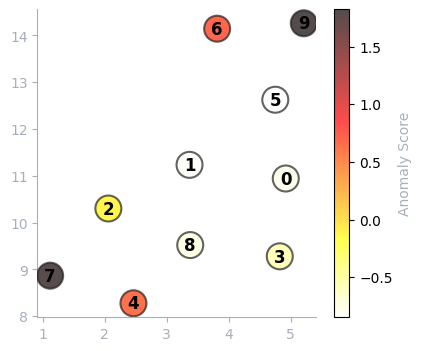

In [ ]:
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.combination import average, maximization
from pyod.utils.utility import standardizer

base_models = [KNN(n_neighbors=2), LOF(n_neighbors=4), IForest(n_estimators=100)]
outlier_scores = [model.fit(X_processed).decision_scores_ for model in base_models]
outlier_scores_norm = standardizer(np.column_stack(outlier_scores))
combined_score = maximization(outlier_scores_norm)
# combined_score = average(outlier_scores_norm)

X['AnomalyScore'] = combined_score
X['Outlier'] = np.where(X['AnomalyScore'] > np.percentile(X['AnomalyScore'], 90), 1, 0)

draw_data_points(X_transformed, X)

<div class='markdown-google-sans'>

### **Feature Bagging**
</div>
<img src="https://i.imgur.com/BDu0DUB.png" width=800 />


<img src="https://i.imgur.com/PHJyRjv.png" width=800 />

<img src="https://i.imgur.com/oKxRHCh.png" width=800 />

<img src="https://i.imgur.com/OVPy2IX.png" width=800 />

<img src="https://i.imgur.com/xWF53fP.png" width=800 />


<img src="https://i.imgur.com/UuQtTzU.png" width=800 />


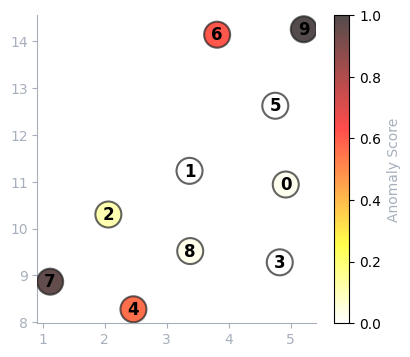

In [ ]:
from pyod.models.lof import LOF
from pyod.models.feature_bagging import FeatureBagging

model = FeatureBagging(base_estimator=LOF(n_neighbors=4))
model.fit(X_processed)

# Get outlier labels and anomaly scores
X['Outlier'] = model.labels_
scaler = MinMaxScaler()
X['AnomalyScore'] = scaler.fit_transform(model.decision_scores_.reshape(-1,1))

draw_data_points(X_transformed, X)

<img src="https://i.imgur.com/vXpVCYg.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Anomaly Detection: Ensemble-based** Summarized
</div>

In [ ]:
!pip install umap-learn -q
!pip install pyod -q
!pip install combo -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


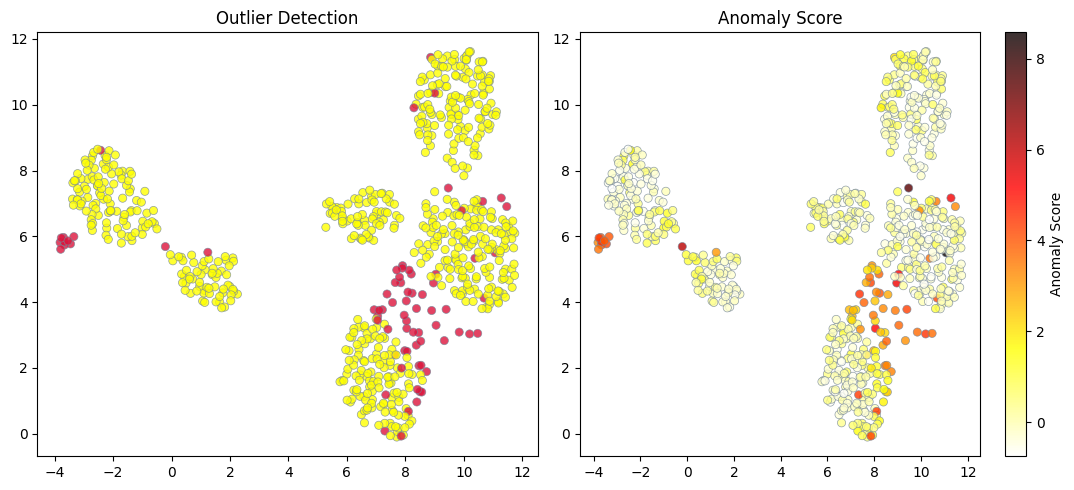

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from umap import UMAP

from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.combination import average, maximization
from pyod.models.feature_bagging import FeatureBagging
from pyod.utils.utility import standardizer

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/l0ty62z9t67qwzjc6i5vb/golf_practice_dataset_mini_outlier.csv?rlkey=d5pydthx4ew0djn1r2if8wkut&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='MembershipID')
X = df.drop(['Outlier'], axis=1)

# Preprocessing
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
    ('ohe', OneHotEncoder(), X.select_dtypes(include=['object', 'category']).columns)
], remainder='passthrough')
X_processed = preprocessor.fit_transform(X)

# Combination Method
base_models = [KNN(n_neighbors=2), LOF(n_neighbors=4), IForest(n_estimators=100)]
outlier_scores = [model.fit(X_processed).decision_scores_ for model in base_models]
outlier_scores_norm = standardizer(np.column_stack(outlier_scores))
combined_score = maximization(outlier_scores_norm)
# combined_score = average(outlier_scores_norm)

X['AnomalyScore'] = combined_score
X['Outlier'] = np.where(X['AnomalyScore'] > np.percentile(X['AnomalyScore'], 90), 1, 0)

# Feature Bagging Method
# model = FeatureBagging(base_estimator=LOF())
# model.fit(X_processed)
# X['Outlier'] = model.predict(X_processed)
# X['AnomalyScore'] = model.decision_scores_

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 11-5**
</div>
Using Feature Bagging with KNN (n_neighbors=5), get the outliers of the following dataset. Save it in a column called 'Outlier' then check the visualization using UMAP.



In [ ]:
# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Data Preparation
X_train = df.drop(['Play'], axis=1)

# ① Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('std_scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# ② Transform Training Set
X_processed = preprocessor.fit_transform(X_train)

In [ ]:
from pyod.models.feature_bagging import FeatureBagging
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from umap import UMAP

from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.combination import average, maximization
from pyod.models.feature_bagging import FeatureBagging
from pyod.utils.utility import standardizer
# Answer
# Combination Method
# base_models = [KNN(n_neighbors=5), LOF(n_neighbors=4), IForest(n_estimators=100)]
# outlier_scores = [model.fit(X_processed).decision_scores_ for model in base_models]
# outlier_scores_norm = standardizer(np.column_stack(outlier_scores))
# combined_score = maximization(outlier_scores_norm)
# # combined_score = average(outlier_scores_norm)

# X['AnomalyScore'] = combined_score
# X['Outlier'] = np.where(X['AnomalyScore'] > np.percentile(X['AnomalyScore'], 90), 1, 0)

#Feature Bagging Method
model = FeatureBagging(base_estimator=KNN(n_neighbors=5))
model.fit(X_processed)
X['Outlier'] = model.predict(X_processed)
X['AnomalyScore'] = model.decision_scores_

# Visualize
method = UMAP(n_neighbors=50, min_dist=0.5, random_state=42, n_jobs=1)
X_transformed = method.fit_transform(X_processed)

# Plot Outlier
plt.figure(figsize=(11, 5))
plt.subplot(121)
colors = np.where(X['Outlier'] == 1, 'crimson', 'yellow')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=colors, edgecolor='lightslategrey', linewidth=0.5)
plt.title("Outlier Detection")

# Plot AnomalyScore
plt.subplot(122)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            s=35, alpha=0.8, c=X['AnomalyScore'], cmap='hot_r', edgecolor='lightslategrey', linewidth=0.5)
plt.title("Anomaly Score")
plt.colorbar(label='Anomaly Score')

plt.tight_layout()
plt.show()

please install combo first for combination by `pip install combo`


ModuleNotFoundError: No module named 'combo'